In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression


In [ ]:
x , y = make_regression(n_samples = 100, n_features =  1 , n_informative = 1 ,n_targets = 1, noise = 20 , random_state = 13 )



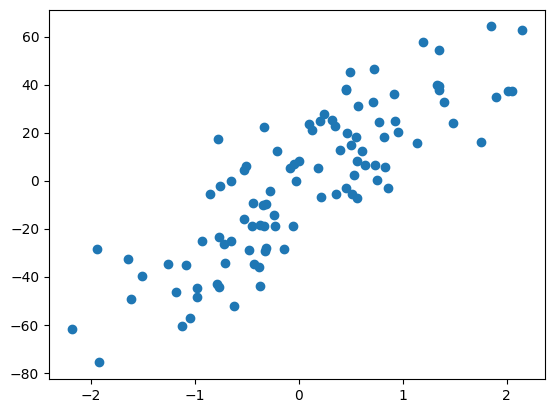

In [ ]:
plt.scatter(x,y)

In [ ]:
lr = LinearRegression()


In [ ]:
lr.fit(x, y)

LinearRegression()

In [ ]:
m =  lr.coef_
b = lr.intercept_
print(m) #27.82809103
print(b) #-2.29474455867698

[27.82809103]
-2.29474455867698


**CALCULATING B , WHEN M IS KNOWN**

In [ ]:
class GDRegressor() :
  def __init__(self , learning_rate , epochs):
    self.m = 27.82809103
    self.b = 0
    self.lr = learning_rate
    self.epochs = epochs
  def fit(self ,x,y):
    #calculate b using gradient descent assuming m is known
    for i in range(self.epochs) :
          slope =  -2*np.sum(y- (self.m*x.ravel()) - self.b )
          step_size = self.lr * slope
          self.b = self.b - step_size
          print(step_size , self.b)
    print("_______________________END_________________")
    print(self.b)

x , y = make_regression(n_samples = 100, n_features =  1 , n_informative = 1 ,n_targets = 1, noise = 20 , random_state = 13 )


gd = GDRegressor(0.001, 20)
gd.fit(x,y)

0.4589489117059571 -0.4589489117059571
0.36715912936476575 -0.8261080410707229
0.29372730349181264 -1.1198353445625355
0.2349818427934499 -1.3548171873559856
0.18798547423476003 -1.5428026615907455
0.150388379387808 -1.6931910409785536
0.12031070351024627 -1.8135017444887997
0.09624856280819709 -1.9097503072969968
0.07699885024655785 -1.9867491575435547
0.06159908019724605 -2.0483482377408007
0.049279264157796945 -2.0976275018985975
0.03942341132623767 -2.137050913224835
0.031538729060990006 -2.1685896422858253
0.025230983248792072 -2.1938206255346175
0.020184786599033628 -2.214005412133651
0.016147829279226776 -2.2301532414128777
0.01291826342338144 -2.243071504836259
0.010334610738705372 -2.2534061155749643
0.00826768859096417 -2.2616738041659286
0.006614150872771319 -2.2682879550387
_______________________END_________________
-2.2682879550387


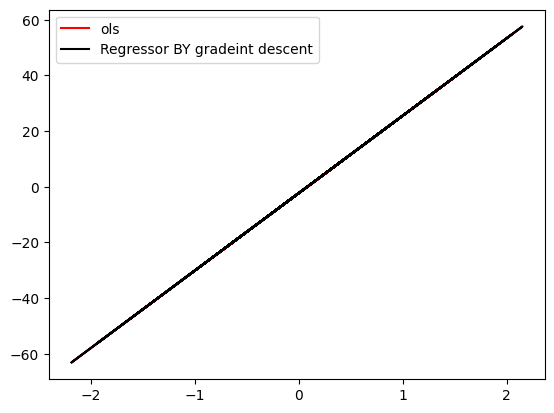

In [ ]:
b = -2.2682879550387
m  = 27.82809103
Y = m*x + b
plt.plot(x, lr.predict(x) , color = 'red' ,  label  = 'ols')
plt.plot(x, Y , color = 'black' ,  label = 'Regressor BY gradeint descent')
plt.legend()
plt.show()

#**CALCULATING M AND B BOTH **

In [ ]:
class GDRegressor() :
  def __init__(self , learning_rate , epochs):
    self.m = 100 # random value of m
    self.b = 120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self ,x,y):
    #calculate b using gradient descent assuming m is known
    b = []
    for i in range(self.epochs) :
          b.append(self.b)
          slope_b =  -2*np.sum(y- (self.m*x.ravel()) - self.b )
          slope_m = -2*np.sum ((y- (self.m*x.ravel()) - self.b )*x.ravel())
          step_size_b = self.lr * slope_b
          step_size_m = self.lr * slope_m
          self.b = self.b - step_size_b
          self.m = self.m - step_size_m
    return b
           # print(f'm = {self.m} , b= {self.b}')
    # print("_______________________END_________________")
    # print(f'm = {self.m} , b= {self.b}')

x , y = make_regression(n_samples = 100, n_features =  1 , n_informative = 1 ,n_targets = 1, noise = 20 , random_state = 13 )


gd = GDRegressor(0.001, 35)
b = gd.fit(x,y)





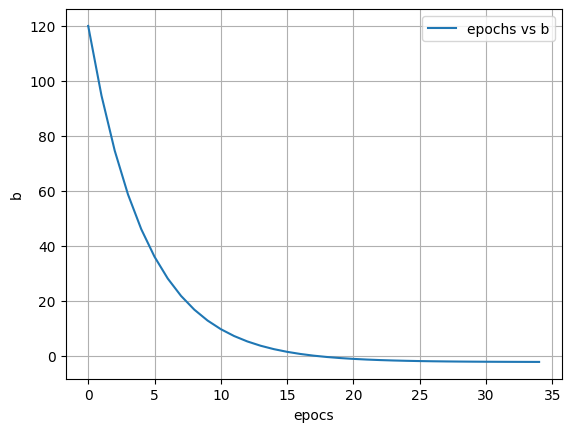

In [ ]:
e = np.arange(0 , 35 )
plt.plot(e , b , label  = "epochs vs b")
plt.xlabel("epocs")
plt.ylabel("b")
plt.legend()
plt.grid()
plt.show()


In [ ]:

from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
x, y = load_diabetes(return_X_y=True)

# Instead of returning a bunch object (which behaves like a dictionary with .data, .target, .feature_names, etc.),

# it directly returns two separate variables:

# x → the input features (data)

# y → the target values (labels)
x.shape


(442, 10)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(reg.coef_) # b1 b2 b3 .. b 10
print(reg.intercept_)  # b0

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [ ]:
X_train.shape

(353, 10)

**BATCH GRADEINT DESCENT**

In [ ]:
class GDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef = None
        self.intercept = None
        self.lr = learning_rate
        self.epochs = epochs


    def fit(self , x ,y):
      self.coef = np.ones(x.shape[1])
      self.intercept = 0
      for i in range(self.epochs) :
        # calculating intercept : Bo
          y_pred = np.dot(x,self.coef ) + self.intercept
          slope_of_bo  = -2 * np.mean(y - y_pred)
          self.intercept = self.intercept - self.lr*slope_of_bo
        # calculating Coeffient
          slope_of_coeff  = (-2/ x.shape[0]) * np.dot( ( y-y_pred) , x )
          self.coef = self.coef - (self.lr*slope_of_coeff)
      print(self.coef , self.intercept)


    def predict(self , x_test):
      return np.dot(self.coef , x_test) + self.interceopt





In [ ]:
gdr = GDRegressor(epochs=1000,learning_rate=0.5)

In [ ]:
gdr.fit(X_train,y_train)

[  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278] 152.01351687661833


# **STOCASTIC GRADIENT DESCENT**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# In Stochastic Gradient Descent (SGD):

# You pick only ONE random row.

# Only that row’s feature values are used.

# So you use that row's feature values (x_train[rand_index]), which gives you a small update (one mini-slope for each feature).

# ✅ One update for all coefficients using only one data point

In [ ]:
class SGDRegressor:

    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, x_train, y_train):
        self.coef_ = np.ones(x_train.shape[1])
        self.intercept_ = 0

        for i in range(self.epochs):
            for j in range(x_train.shape[0]):
                rand_index = np.random.randint(0, x_train.shape[0])

                # Prediction with intercept
                y_pred = np.dot(x_train[rand_index], self.coef_) + self.intercept_

                # Slope for intercept (bias)
                slope_of_b = -2 * (y_train[rand_index] - y_pred)
                self.intercept_ = self.intercept_ - self.lr * slope_of_b

                # Slope for coefficients (weights)
                slope_ = -2 * np.dot((y_train[rand_index] - y_pred), x_train[rand_index])
                self.coef_ = self.coef_ - self.lr * slope_
    def predict(self,x_test) :
        return np.dot(x_test,self.coef_) + self.intercept_


In [ ]:
import numpy as np
import pandas as pd

# Small dataset
x_train = np.array([[1], [2], [3], [4], [5]])   # 5 rows, 1 feature (simple 1D data)
y_train = np.array([3, 5, 7, 9, 11])            # y = 2x + 1 (line)

# Create SGD model
sgd = SGDRegressor(learning_rate=0.01, epochs=50)

# Fit model
sgd.fit(x_train, y_train)

# Predict
predictions = sgd.predict(x_train)

# See coefficients
print("Coef:", sgd.coef_)
print("Intercept:", sgd.intercept_)
print("Predictions:", predictions)


Coef: [2.0865902]
Intercept: 0.7112747363169285
Predictions: [ 2.79786494  4.88445513  6.97104533  9.05763553 11.14422573]


# **MINI BATCH GD**


In [2]:
import random

class MBGDRegressor:

    def __init__(self,batch_size,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            for j in range(int(X_train.shape[0]/self.batch_size)):

                idx = random.sample(range(X_train.shape[0]),self.batch_size)

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_


In [ ]:
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)